# 1. Dataset Preprocessing


#### 1.1 Load Data


In [23]:
src_path_asd = "/Users/coderwolf/code/research/GazeASD/dataset/saliency4ASD/ASD/"
src_path_td = "/Users/coderwolf/code/research/GazeASD/dataset/saliency4ASD/TD/"

src_path_asd = "/Users/coderwolf/code/proj-research/GazeASD/dataset/saliency4ASD/ASD/"
src_path_td = "/Users/coderwolf/code/proj-research/GazeASD/dataset/saliency4ASD/TD/"

dest_path_asd = "/Users/coderwolf/code/research/GazeASD/dataset/saccade/ASD/"
dest_path_td = "/Users/coderwolf/code/research/GazeASD/dataset/saccade/TD/"

#### 1.2 Compute Features


In [24]:
import numpy as np

def calculate_saccade_amplitude(point1, point2):
    return np.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

def calculate_saccade_duration(duration):
    return duration

def calculate_saccade_peak_velocity(amplitude, duration):
    return amplitude / duration


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def calculate_saccade_metrics(file_path, plot=False):
    df = pd.read_csv(file_path)

    amplitudes = []
    durations = []
    velocities = []

    for i in range(len(df) - 1):
        point1 = df.iloc[i, 1:3].values
        point2 = df.iloc[i + 1, 1:3].values
        duration = df.iloc[i, 3]

        amplitude = calculate_saccade_amplitude(point1, point2)
        duration = calculate_saccade_duration(duration)
        velocity = calculate_saccade_peak_velocity(amplitude, duration)

        amplitudes.append(amplitude)
        durations.append(duration)
        velocities.append(velocity)
    
    # print(amplitudes)
    # print(durations)
    # print(velocities)
    
    avg_amplitudes = sum(amplitudes) / len(amplitudes)
    avg_durations = sum(durations) / len(durations)
    avg_velocities = sum(velocities) / len(velocities)

    # print(avg_amplitudes)
    # print(avg_durations)
    # print(avg_velocities)

    return [avg_amplitudes, avg_durations, avg_velocities]


In [26]:
asd_amplitudes = []
asd_durations = []
asd_velocities = []
for i in range(1, 300):
  temp = calculate_saccade_metrics(src_path_asd + 'ASD_scanpath_' + str(i) + '.csv')
  asd_amplitudes.append(temp[0])
  asd_durations.append(temp[1])
  asd_velocities.append(temp[2])

In [11]:
print(sum(asd_amplitudes)/len(asd_amplitudes))
print(sum(asd_durations)/len(asd_durations))
print(sum(asd_velocities)/len(asd_velocities))

ZeroDivisionError: division by zero

In [27]:
td_amplitudes = []
td_durations = []
td_velocities = []
for i in range(1, 300):
  temp = calculate_saccade_metrics(src_path_td + 'TD_scanpath_' + str(i) + '.csv')
  td_amplitudes.append(temp[0])
  td_durations.append(temp[1])
  td_velocities.append(temp[2])

In [28]:
print(sum(td_amplitudes)/len(td_amplitudes))
print(sum(td_durations)/len(td_durations))
print(sum(td_velocities)/len(td_velocities))

171.20354392098258
322.4300794952055
1.712786597356137


#### 1.3 Visualize the Dataset


In [29]:
a = np.array(asd_amplitudes)
b = np.array(asd_durations)
c = np.array(asd_velocities)

a2 = np.array(td_amplitudes)
b2 = np.array(td_durations)
c2 = np.array(td_velocities)

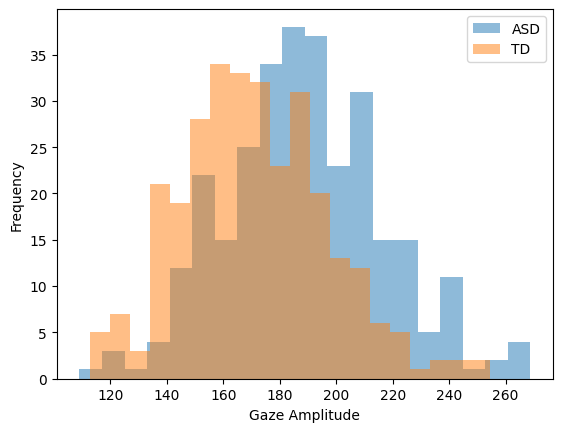

In [46]:
import matplotlib.pyplot as plt

plt.hist(asd_amplitudes, bins=20, alpha=0.5, label='ASD')
plt.hist(td_amplitudes, bins=20, alpha=0.5, label='TD')
plt.xlabel('Gaze Amplitude')
plt.ylabel('Frequency')
plt.legend()
plt.show()


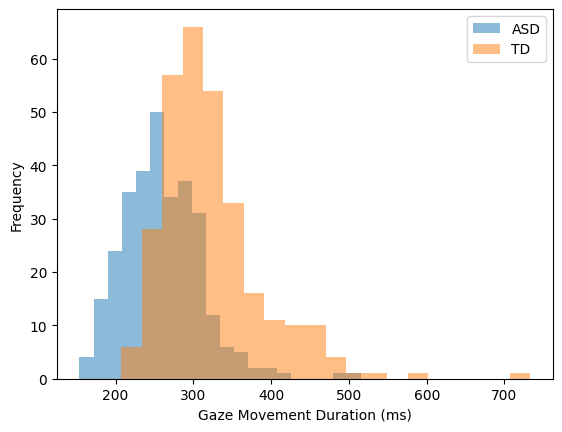

In [45]:
import matplotlib.pyplot as plt

plt.hist(asd_durations, bins=20, alpha=0.5, label='ASD')
plt.hist(td_durations, bins=20, alpha=0.5, label='TD')
plt.xlabel('Gaze Movement Duration (ms)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


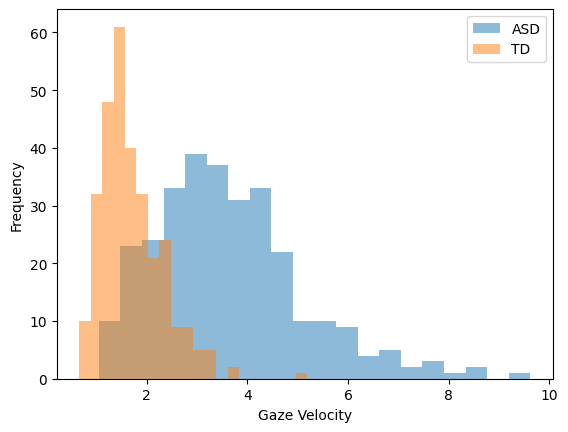

In [47]:
import matplotlib.pyplot as plt

plt.hist(asd_velocities, bins=20, alpha=0.5, label='ASD')
plt.hist(td_velocities, bins=20, alpha=0.5, label='TD')
plt.xlabel('Gaze Velocity')
plt.ylabel('Frequency')
plt.legend()
plt.show()


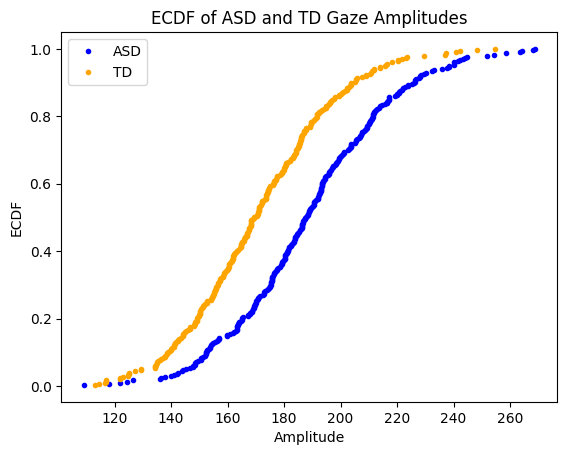

In [57]:
import numpy as np

def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

x_asd, y_asd = ecdf(asd_amplitudes)
x_td, y_td = ecdf(td_amplitudes)

plt.plot(x_asd, y_asd, marker='.', linestyle='none', label='ASD', color='blue')
plt.plot(x_td, y_td, marker='.', linestyle='none', label='TD', color='orange')
plt.xlabel('Amplitude')
plt.ylabel('ECDF')
plt.legend()
plt.title('ECDF of ASD and TD Gaze Amplitudes')
plt.show()


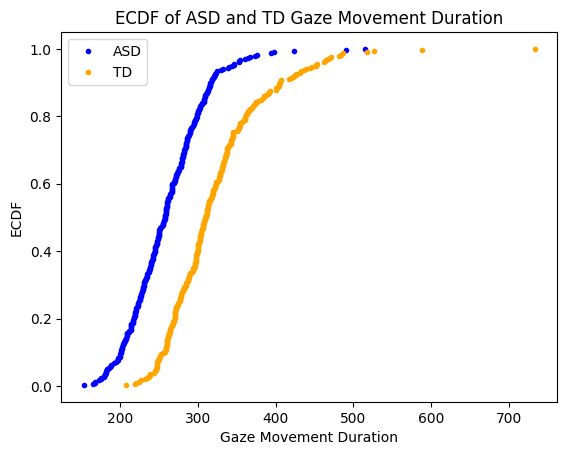

In [55]:
import numpy as np

def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

x_asd, y_asd = ecdf(asd_durations)
x_td, y_td = ecdf(td_durations)

plt.plot(x_asd, y_asd, marker='.', linestyle='none', label='ASD', color='blue')
plt.plot(x_td, y_td, marker='.', linestyle='none', label='TD', color='orange')
plt.xlabel('Gaze Movement Duration')
plt.ylabel('ECDF')
plt.legend()
plt.title('ECDF of ASD and TD Gaze Movement Duration')
plt.show()


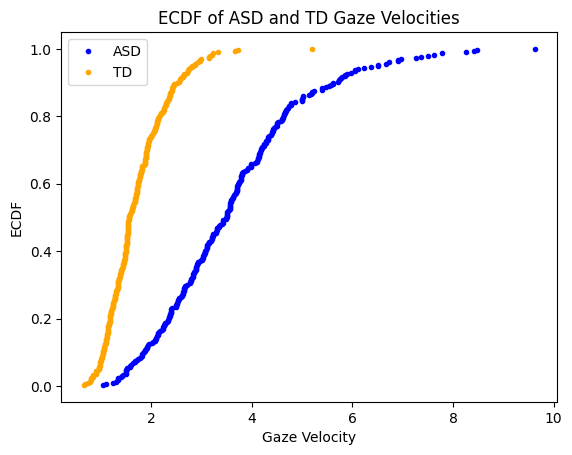

In [56]:
import numpy as np

def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

x_asd, y_asd = ecdf(asd_velocities)
x_td, y_td = ecdf(td_velocities)

plt.plot(x_asd, y_asd, marker='.', linestyle='none', label='ASD', color='blue')
plt.plot(x_td, y_td, marker='.', linestyle='none', label='TD', color='orange')
plt.xlabel('Gaze Velocity')
plt.ylabel('ECDF')
plt.legend()
plt.title('ECDF of ASD and TD Gaze Velocities')
plt.show()


TypeError: The y variable is categorical, but one of ['numeric', 'datetime'] is required

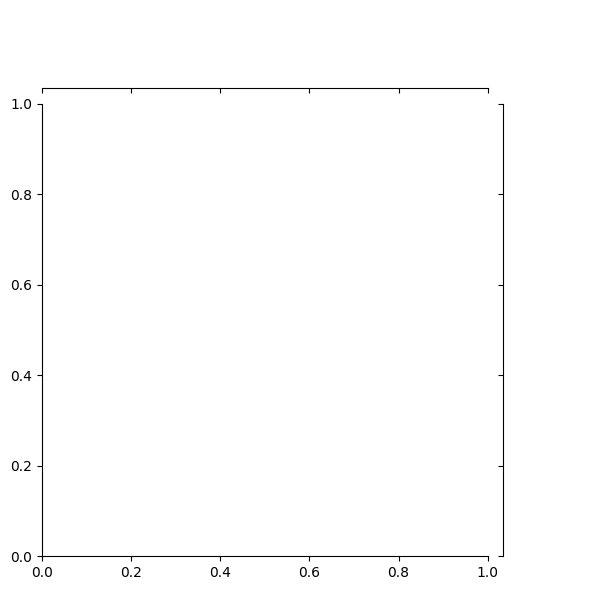

In [67]:
import seaborn as sns

# Assuming you have labels for ASD and TD
labels = np.array(['ASD'] * len(asd_amplitudes) + ['TD'] * len(td_amplitudes))
amplitudes = np.concatenate([asd_amplitudes, td_amplitudes])

sns.jointplot(x=amplitudes, y=labels, kind='kde')
plt.xlabel('Amplitude')
plt.ylabel('Group')
plt.title('Joint Plot of ASD and TD Amplitudes')
plt.show()


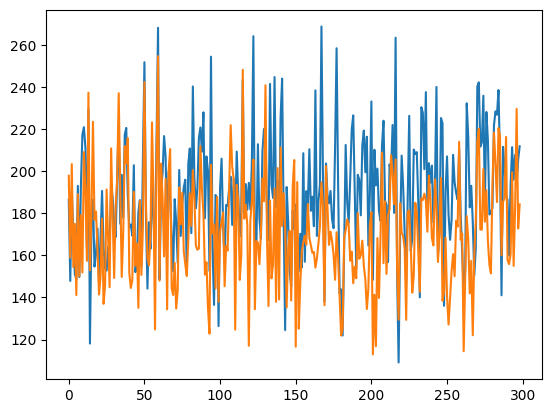

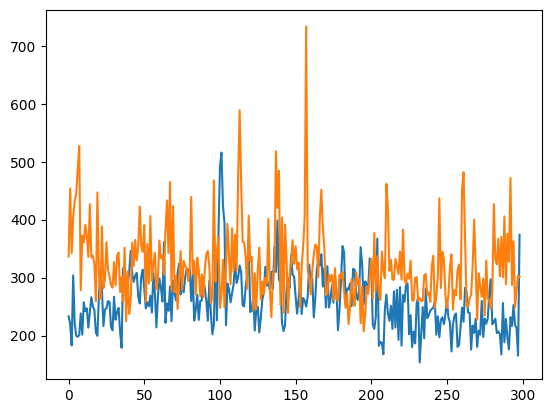

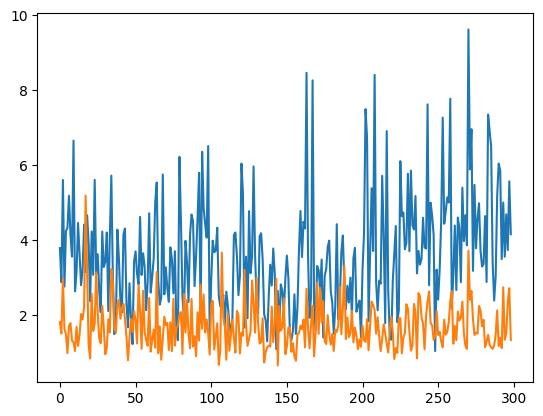

In [30]:
plt.plot(a)
plt.plot(a2)
plt.show()

plt.plot(b)
plt.plot(b2)
plt.show()

plt.plot(c)
plt.plot(c2)
plt.show()

#### 1.4 Combine the dataset


In [31]:
amplitudes = asd_amplitudes + td_amplitudes
durations = asd_durations + td_durations
velocities = asd_velocities + td_velocities

input_data = np.array([amplitudes, durations, velocities]).T
output_data = []

for i in range(len(asd_amplitudes)):
    output_data.append(1)

for i in range(len(asd_amplitudes)):
    output_data.append(0)

output_data = np.array(output_data)

#### 1.5 Train - Test Split


In [32]:
from sklearn.model_selection import train_test_split

# Assuming you have input_data and output_data from the previous steps

# Split the data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(input_data, output_data, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now, X_train, y_train are your training data and labels
# X_val, y_val are your validation data and labels
# X_test, y_test are your test data and labels


In [33]:
# Reshape y_train and y_test
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# 2. Model Training


## 2.1. Classical ML


### **Algorithms:**

- [x] Logistic Regression
- [x] Multinomial Logistic Regression
- [x] decision trees,
- [x] random forest,
- [x] k-nearest neighbors, (KNN)
- [x] support vector machines (SVM)
- [x] Gradient Boosting
- [ ] 
- [ ] 
- [ ] 
- [ ] 
- [ ] 

### **Results:**

##### 1. Logistic Regression:

Amplitude = 63.37792642140469 %

Duration = 71.23745819397993 %

Velocity = 82.77591973244147 %

##### 2. Multimodal Logistic Regression:


### 2.1.1 Logistic Regression


In [34]:
import numpy as np
from sklearn import linear_model


x = []
y = []

# asd_data = asd_amplitudes
# td_data = td_amplitudes

# asd_data = asd_durations
# td_data = td_durations

asd_data = asd_velocities
td_data = td_velocities

x.extend(asd_data)
for i in range(len(asd_data)):
    y.append(1)

x.extend(td_data)
for i in range(len(td_data)):
    y.append(0)


x = np.array(x).reshape(-1,1)
y = np.array(y)

model = linear_model.LogisticRegression()
model.fit(x,y)

predicted = []
real = []

for i in range(len(x)):
    curr_prediction = model.predict(np.array([x[i]]).reshape(-1,1))
    predicted.append(curr_prediction)
    real.append(y[i])

true = 0
false = 0
total = len(predicted)

for i in range(total):
    if predicted[i] == real[i]:
        true += 1
    else:
        false += 1

print("TRUE", true)
print("FALSE", false)

accuracy = (true / total) * 100
print("Accuracy = ", accuracy, "%")

TRUE 495
FALSE 103
Accuracy =  82.77591973244147 %


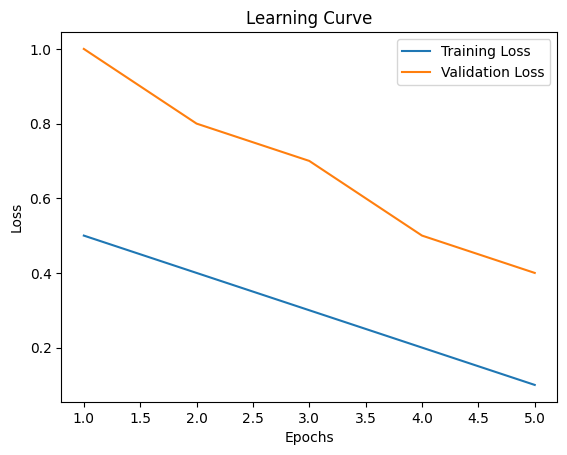

In [35]:
import matplotlib.pyplot as plt

def plot_learning_curve(train_losses, val_losses):
    epochs = range(1, len(train_losses) + 1)

    plt.plot(epochs, train_losses, label='Training Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')

    plt.title('Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Example usage:
train_losses = [0.5, 0.4, 0.3, 0.2, 0.1]
val_losses = [1.0, 0.8, 0.7, 0.5, 0.4]

plot_learning_curve(train_losses, val_losses)


##### Results, **Logistic Regression**:

Amplitude = 63.37792642140469 %

Duration = 71.23745819397993 %

Velocity = 82.77591973244147 %


##### Which classical ML algorithms to use?

3 independent variables, but 1 dependent variable. what ML algorithm goes best with this? the dependent variable is bound to 2 classes, as in this is a binary classification problem

- [ ] Multinomial Logistic Regression
- [ ] decision trees,
- [ ] random forest,
- [ ] k-nearest neighbors, (KNN)
- [ ] support vector machines (SVM)
- [ ] Gradient Boosting


### 2.1.2 Multinomal Logistic Regression


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train.ravel())

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy_val:.2f}')

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {accuracy_test:.2f}')

# Display classification report on the test set
print('\nClassification Report on Test Set:\n', classification_report(y_test, y_test_pred))



Validation Accuracy: 0.83
Test Accuracy: 0.81

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81        41
           1       0.90      0.73      0.81        49

    accuracy                           0.81        90
   macro avg       0.82      0.82      0.81        90
weighted avg       0.83      0.81      0.81        90



### 2.1.2 KNN - K Nearest Neighbors


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Choose the number of neighbors (K)
k_neighbors = 5

# Create the KNN model
knn_model = KNeighborsClassifier(n_neighbors=k_neighbors)

# Train the model on the training data
knn_model.fit(X_train, y_train.ravel())

# Make predictions on the validation set
y_val_pred_knn = knn_model.predict(X_val)

# Evaluate the model on the validation set
accuracy_val_knn = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {accuracy_val_knn:.2f}')

# Make predictions on the test set
y_test_pred_knn = knn_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test_knn = accuracy_score(y_test, y_test_pred_knn)
print(f'KNN Test Accuracy: {accuracy_test_knn:.2f}')

# Display classification report on the test set
print('\nKNN Classification Report on Test Set:\n', classification_report(y_test, y_test_pred_knn))


KNN Validation Accuracy: 0.67
KNN Test Accuracy: 0.71

KNN Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.65      0.78      0.71        41
           1       0.78      0.65      0.71        49

    accuracy                           0.71        90
   macro avg       0.72      0.72      0.71        90
weighted avg       0.72      0.71      0.71        90



### 2.1.4 SVM - Support Vector Machine


In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train.ravel())

# Make predictions on the validation set
y_val_pred_svm = svm_model.predict(X_val)

# Evaluate the model on the validation set
accuracy_val_svm = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {accuracy_val_svm:.2f}')

# Make predictions on the test set
y_test_pred_svm = svm_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test_svm = accuracy_score(y_test, y_test_pred_svm)
print(f'SVM Test Accuracy: {accuracy_test_svm:.2f}')

# Display classification report on the test set
print('\nSVM Classification Report on Test Set:\n', classification_report(y_test, y_test_pred_svm))


SVM Validation Accuracy: 0.81
SVM Test Accuracy: 0.83

SVM Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.75      0.95      0.84        41
           1       0.95      0.73      0.83        49

    accuracy                           0.83        90
   macro avg       0.85      0.84      0.83        90
weighted avg       0.86      0.83      0.83        90



### 2.1.5 Random Forest


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train.ravel())

# Make predictions on the validation set
y_val_pred_rf = rf_model.predict(X_val)

# Evaluate the model on the validation set
accuracy_val_rf = accuracy_score(y_val, y_val_pred_rf)
print(f'Random Forest Validation Accuracy: {accuracy_val_rf:.2f}')

# Make predictions on the test set
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
print(f'Random Forest Test Accuracy: {accuracy_test_rf:.2f}')

# Display classification report on the test set
print('\nRandom Forest Classification Report on Test Set:\n', classification_report(y_test, y_test_pred_rf))


Random Forest Validation Accuracy: 0.79
Random Forest Test Accuracy: 0.81

Random Forest Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.73      0.93      0.82        41
           1       0.92      0.71      0.80        49

    accuracy                           0.81        90
   macro avg       0.83      0.82      0.81        90
weighted avg       0.83      0.81      0.81        90



### 2.1.6 Decision Tree


In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
tree_model.fit(X_train, y_train.ravel())

# Make predictions on the validation set
y_val_pred_tree = tree_model.predict(X_val)

# Evaluate the model on the validation set
accuracy_val_tree = accuracy_score(y_val, y_val_pred_tree)
print(f'Decision Tree Validation Accuracy: {accuracy_val_tree:.2f}')

# Make predictions on the test set
y_test_pred_tree = tree_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test_tree = accuracy_score(y_test, y_test_pred_tree)
print(f'Decision Tree Test Accuracy: {accuracy_test_tree:.2f}')

# Display classification report on the test set
print('\nDecision Tree Classification Report on Test Set:\n', classification_report(y_test, y_test_pred_tree))


Decision Tree Validation Accuracy: 0.67
Decision Tree Test Accuracy: 0.78

Decision Tree Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.71      0.85      0.78        41
           1       0.85      0.71      0.78        49

    accuracy                           0.78        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.79      0.78      0.78        90



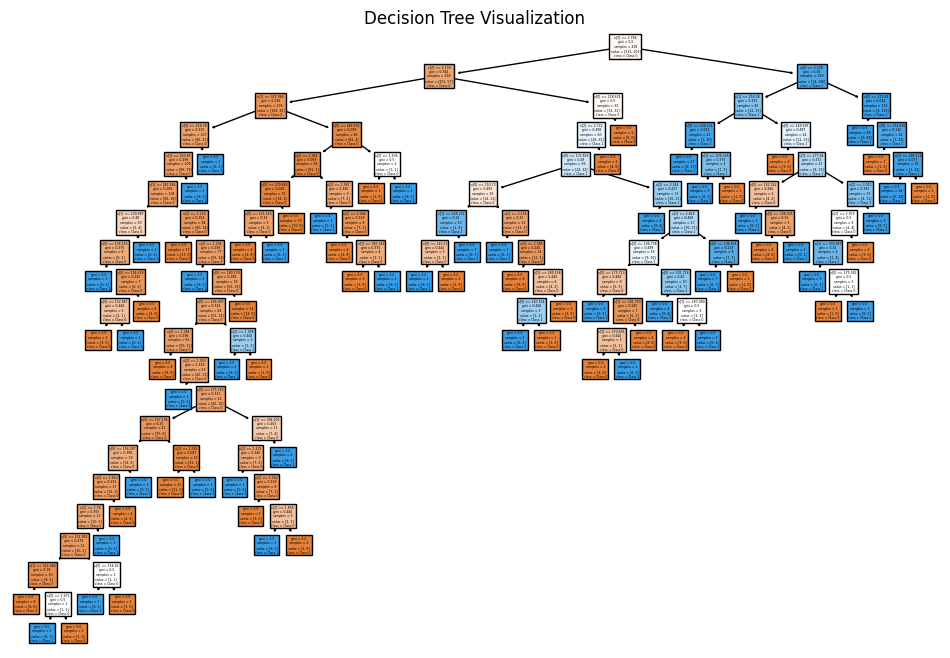

In [70]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, class_names=['Class 0', 'Class 1'])
plt.title('Decision Tree Visualization')
plt.show()


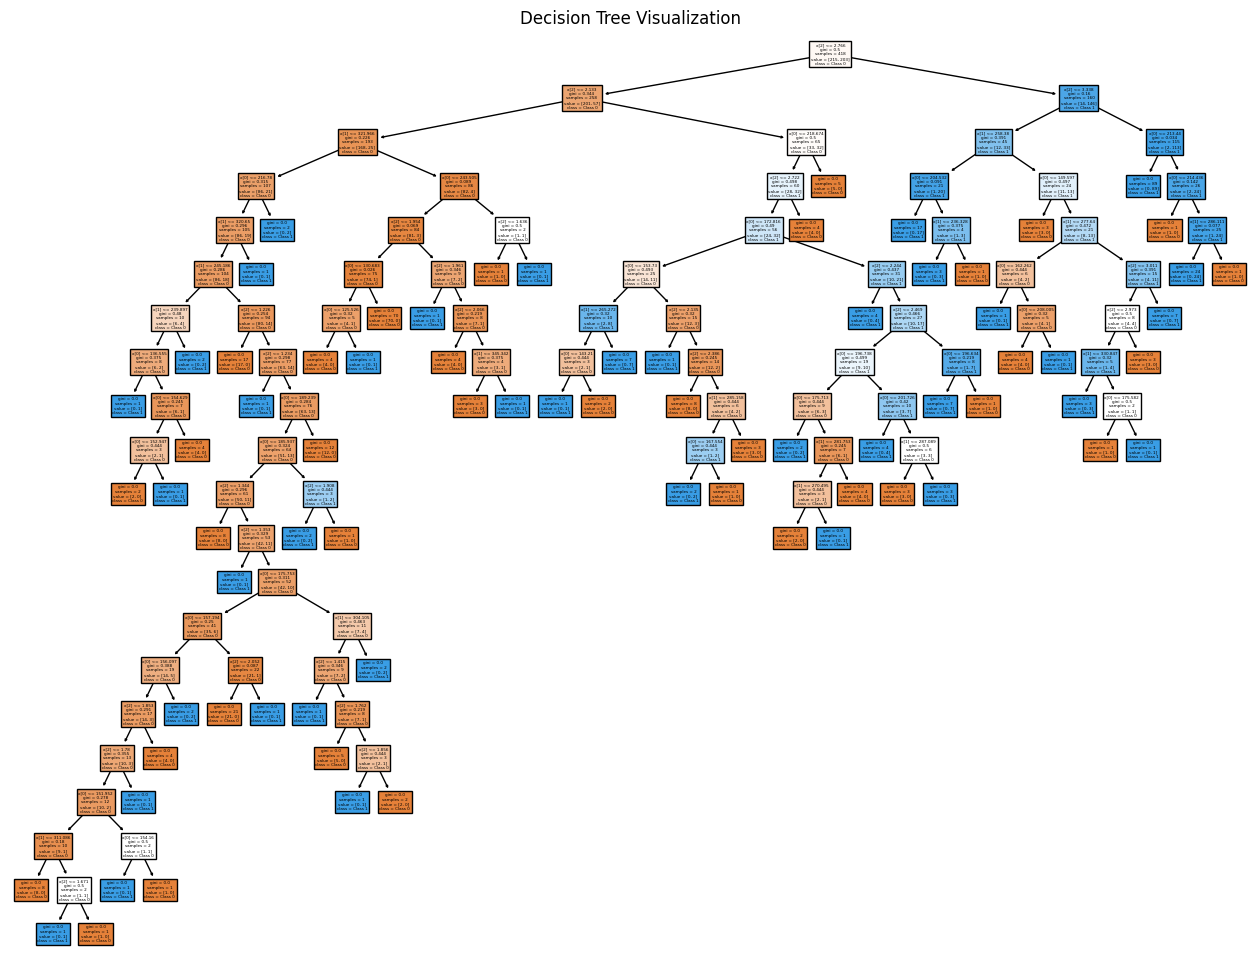

In [71]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Increase figsize for higher resolution
plt.figure(figsize=(16, 12))

# Visualize the Decision Tree
plot_tree(tree_model, filled=True, class_names=['Class 0', 'Class 1'])

# Save the plot in PDF format
plt.savefig('decision_tree_visualization.pdf', format='pdf')

plt.title('Decision Tree Visualization')
plt.show()


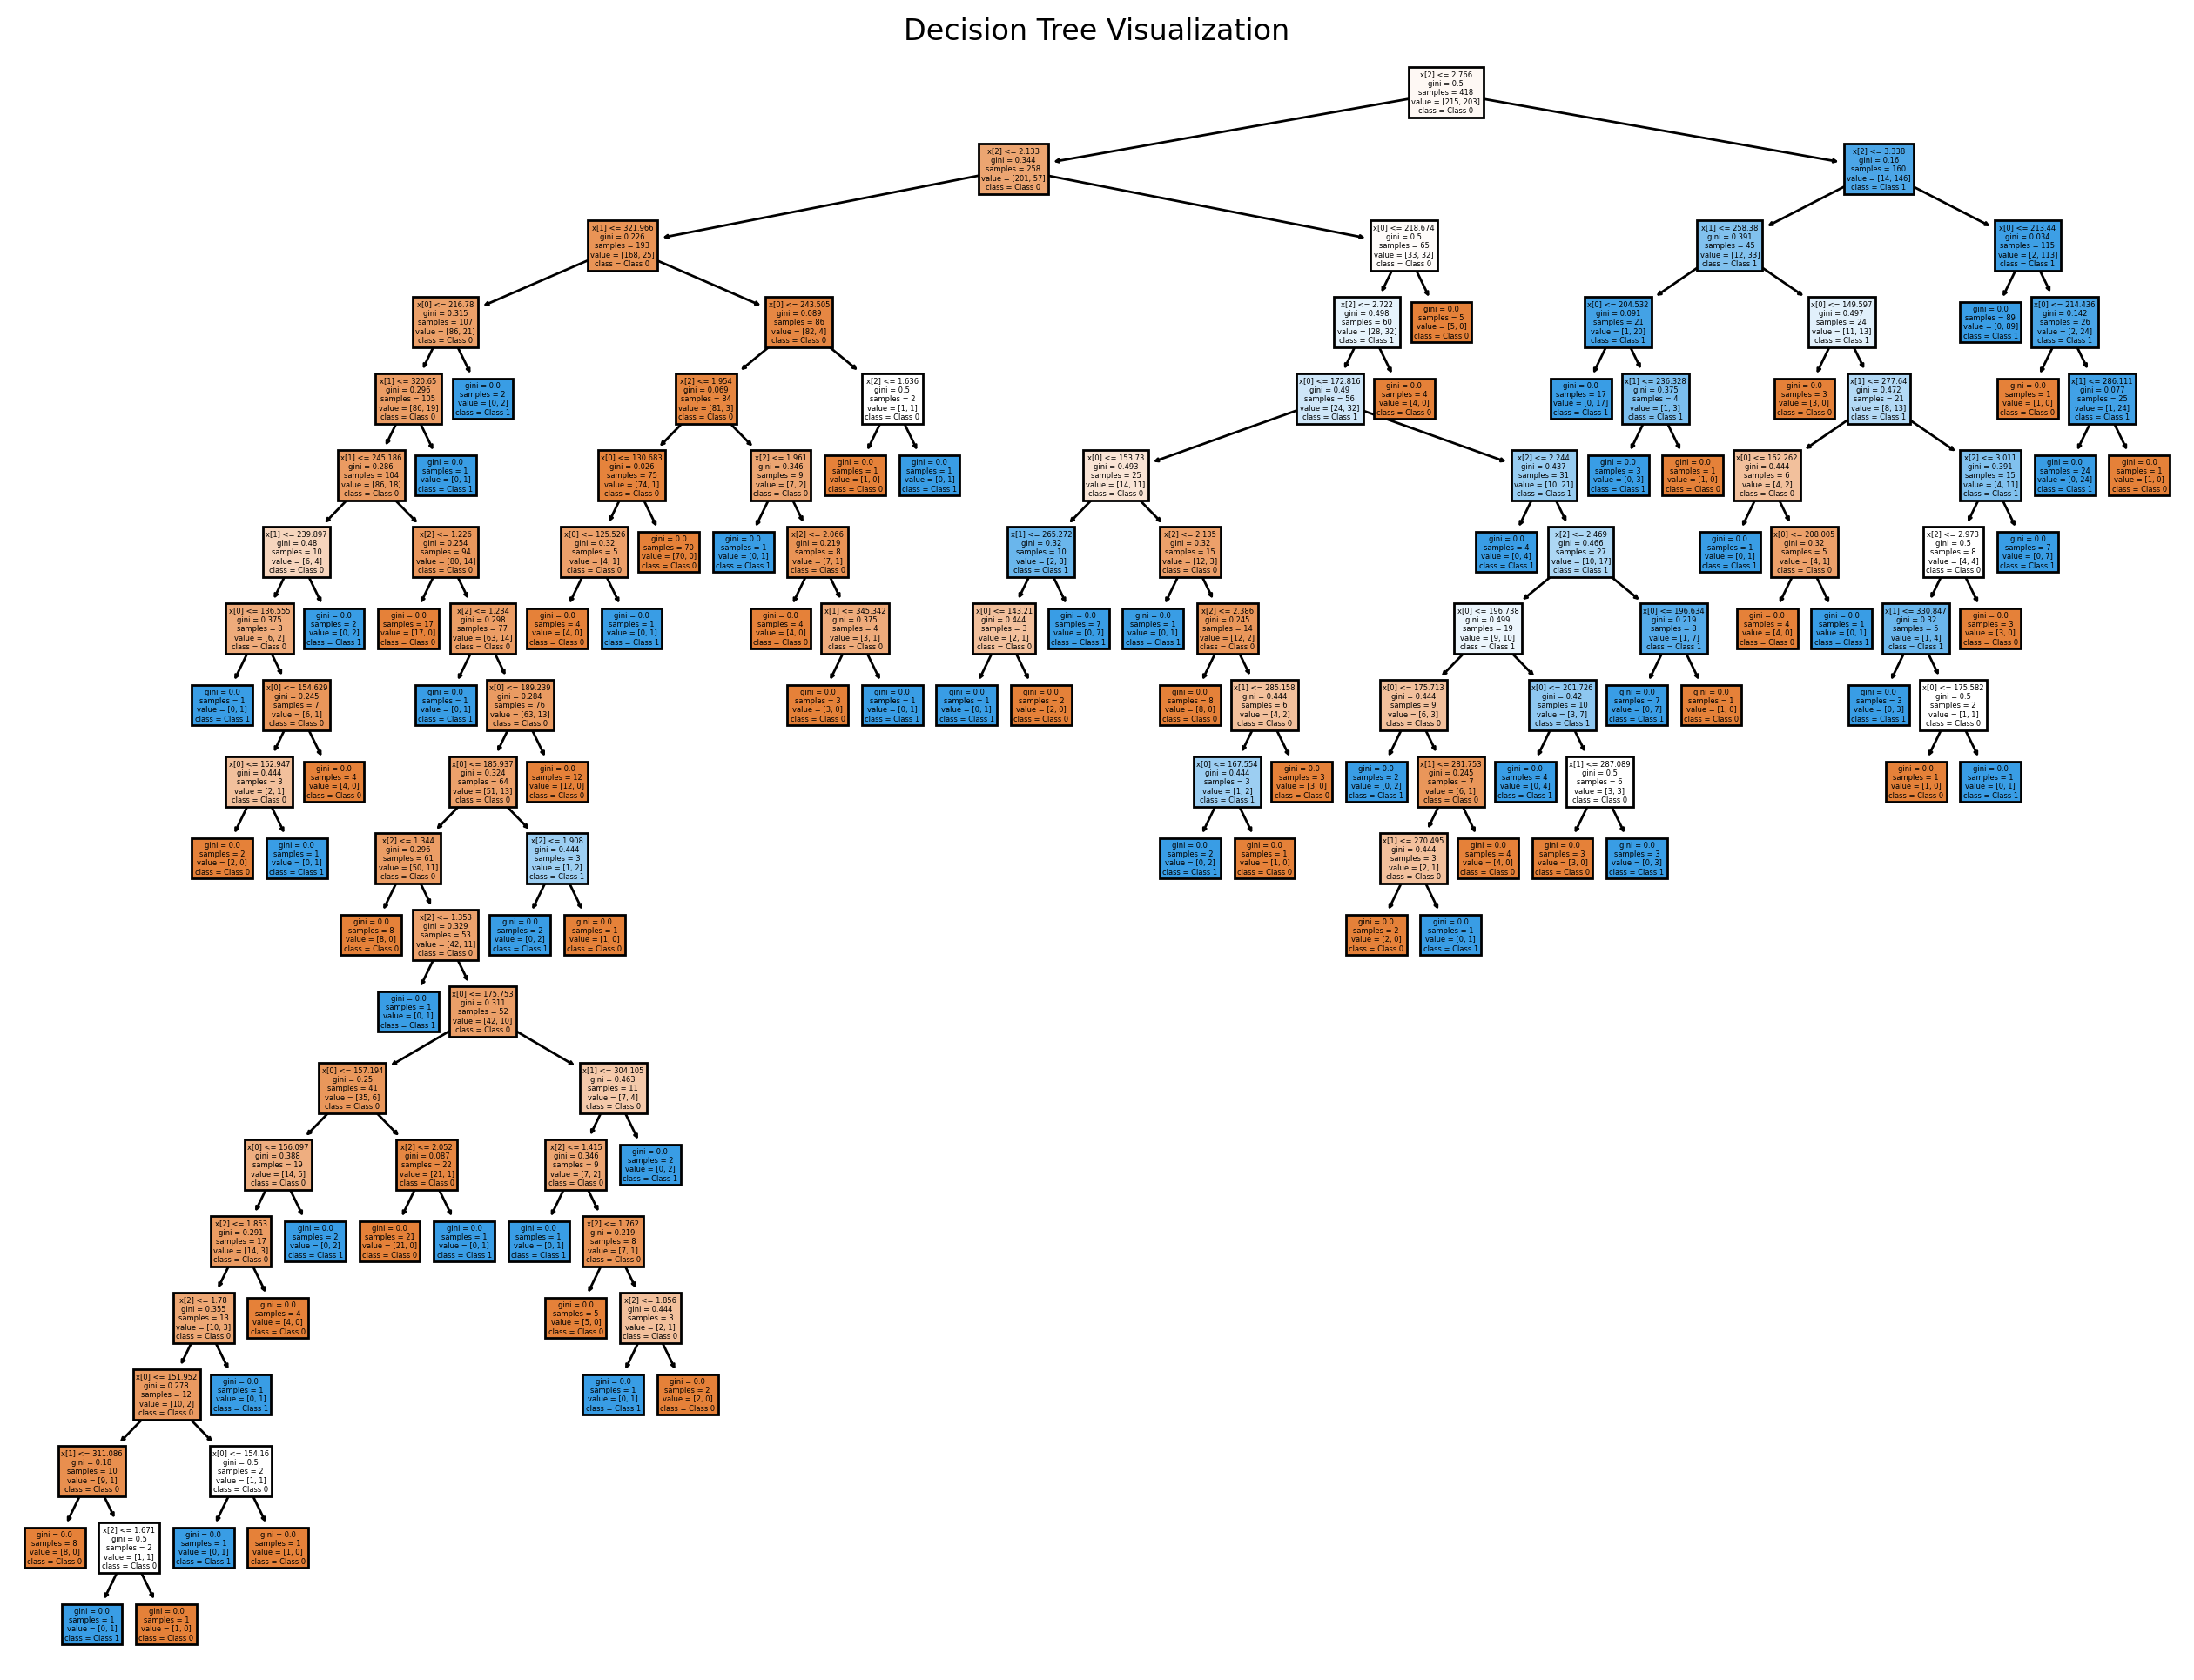

In [72]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set high resolution for inline images
%config InlineBackend.figure_format = 'retina'

# Increase figsize for higher resolution
plt.figure(figsize=(16, 12))

# Visualize the Decision Tree
plot_tree(tree_model, filled=True, class_names=['Class 0', 'Class 1'])

plt.title('Decision Tree Visualization')
plt.show()


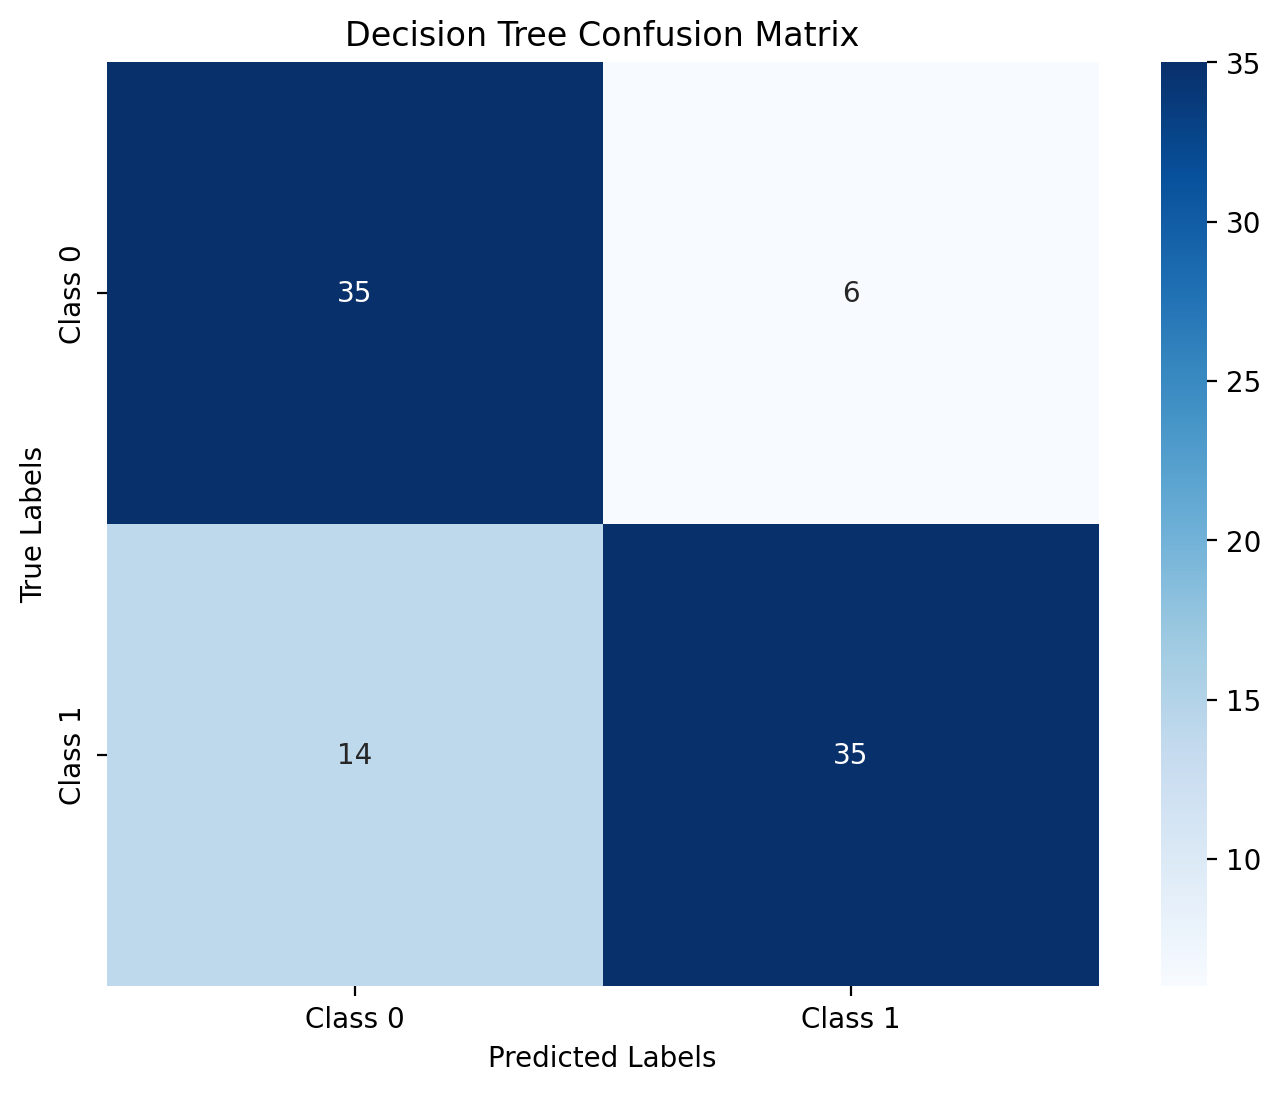

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_test_pred_tree)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


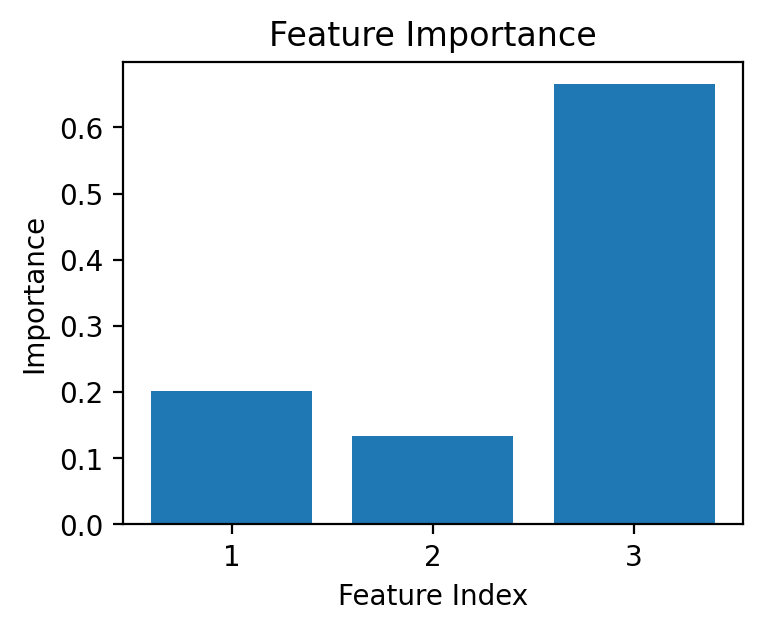

In [86]:
feature_importances = tree_model.feature_importances_
num_features = len(feature_importances)

# Create a bar chart for feature importance
plt.figure(figsize=(4, 3))
plt.bar(range(num_features), feature_importances)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(range(num_features), range(1, num_features + 1))  # Use feature indices as x-axis labels
plt.show()


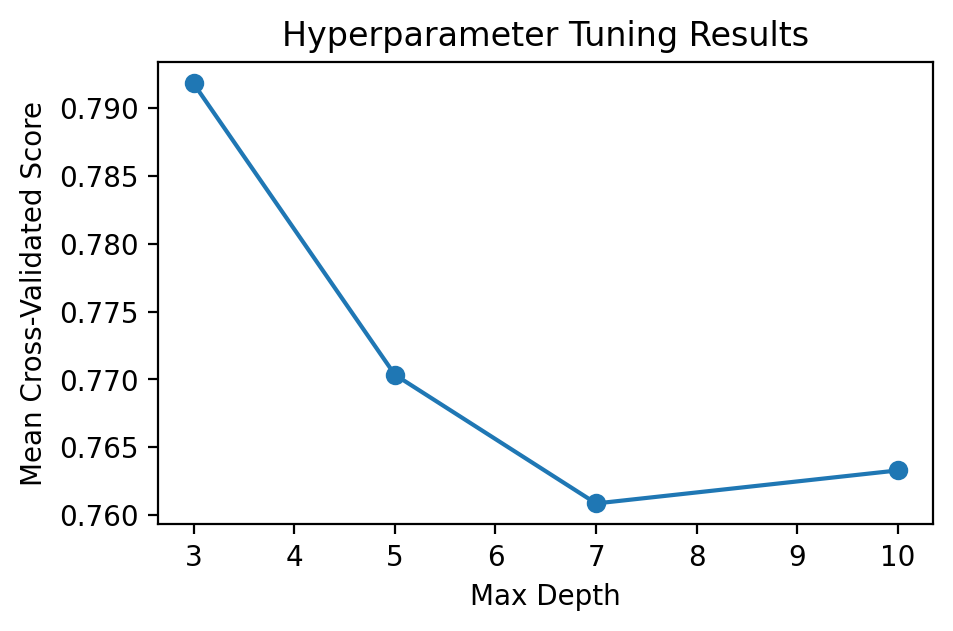

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Assuming you have a range of hyperparameter values to search
param_grid = {'max_depth': [3, 5, 7, 10]}

# Perform grid search
grid_search = GridSearchCV(tree_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Visualize the results
results = grid_search.cv_results_
plt.figure(figsize=(5, 3))
plt.plot(param_grid['max_depth'], results['mean_test_score'], marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Mean Cross-Validated Score')
plt.title('Hyperparameter Tuning Results')
plt.show()


### 2.1.7 Gradient Boosting


In [91]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train.ravel())

# Make predictions on the validation set
y_val_pred_gb = gb_model.predict(X_val)

# Evaluate the model on the validation set
accuracy_val_gb = accuracy_score(y_val, y_val_pred_gb)
print(f'Gradient Boosting Validation Accuracy: {accuracy_val_gb:.2f}')

# Make predictions on the test set
y_test_pred_gb = gb_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test_gb = accuracy_score(y_test, y_test_pred_gb)
print(f'Gradient Boosting Test Accuracy: {accuracy_test_gb:.2f}')

# Display classification report on the test set
print('\nGradient Boosting Classification Report on Test Set:\n', classification_report(y_test, y_test_pred_gb))


Gradient Boosting Validation Accuracy: 0.80
Gradient Boosting Test Accuracy: 0.81

Gradient Boosting Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81        41
           1       0.88      0.76      0.81        49

    accuracy                           0.81        90
   macro avg       0.82      0.82      0.81        90
weighted avg       0.82      0.81      0.81        90



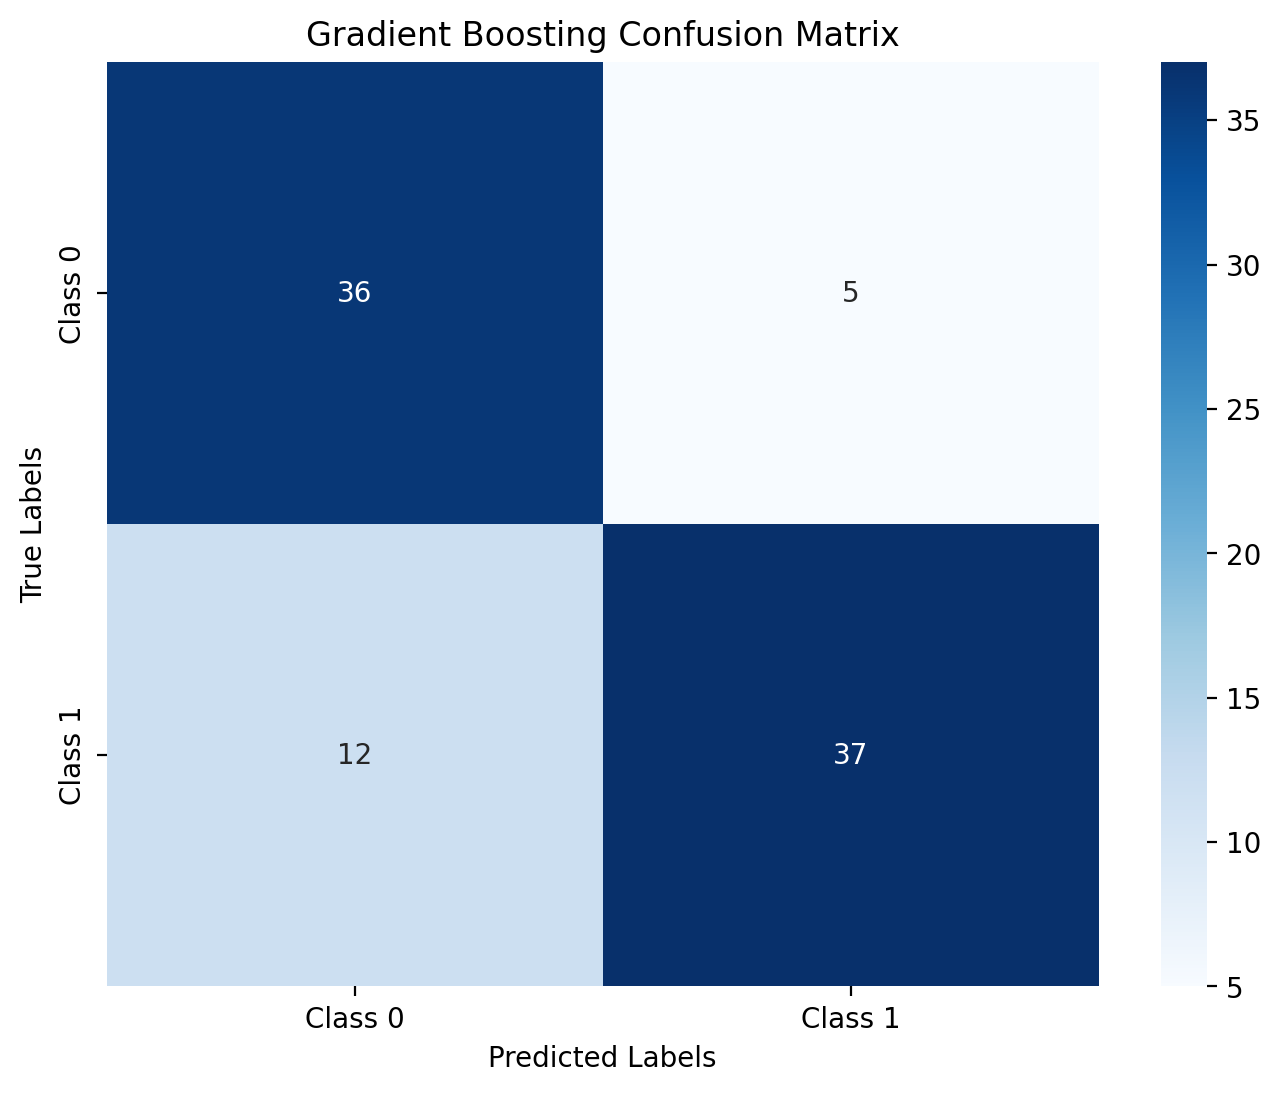

In [92]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix for Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test, y_test_pred_gb)

# Plot the confusion matrix for Gradient Boosting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was pass

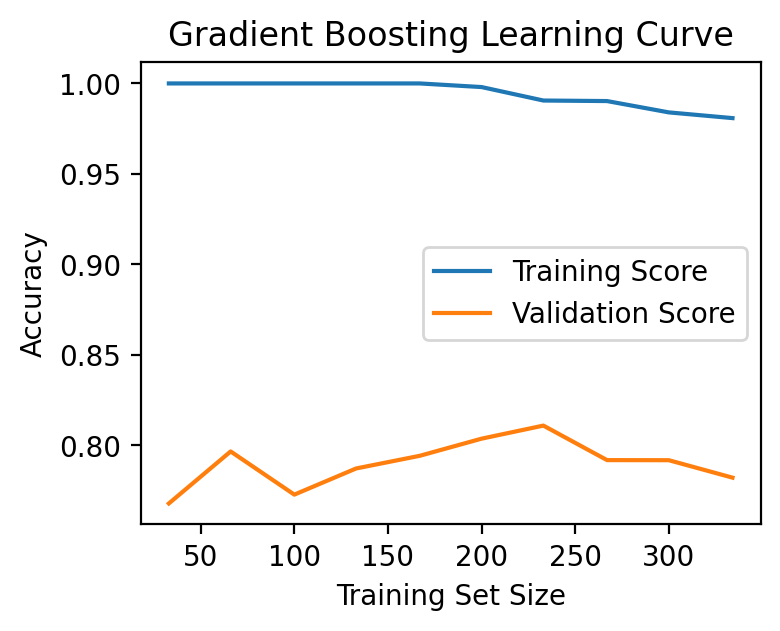

In [97]:
from sklearn.model_selection import learning_curve
import numpy as np

# Generate learning curve data for Gradient Boosting
train_sizes_gb, train_scores_gb, valid_scores_gb = learning_curve(
    gb_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Plot learning curve for Gradient Boosting
plt.figure(figsize=(4, 3))
plt.plot(train_sizes_gb, np.mean(train_scores_gb, axis=1), label='Training Score')
plt.plot(train_sizes_gb, np.mean(valid_scores_gb, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting Learning Curve')
plt.legend()
plt.show()


### 2.1.8 Naive Bayes

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Create the Naive Bayes model (for text data)
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train, y_train.ravel())

# Make predictions on the validation set
y_val_pred_nb = nb_model.predict(X_val)

# Evaluate the model on the validation set
accuracy_val_nb = accuracy_score(y_val, y_val_pred_nb)
print(f'Naive Bayes Validation Accuracy: {accuracy_val_nb:.2f}')

# Make predictions on the test set
y_test_pred_nb = nb_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test_nb = accuracy_score(y_test, y_test_pred_nb)
print(f'Naive Bayes Test Accuracy: {accuracy_test_nb:.2f}')

# Display classification report on the test set
print('\nNaive Bayes Classification Report on Test Set:\n', classification_report(y_test, y_test_pred_nb))


Naive Bayes Validation Accuracy: 0.78
Naive Bayes Test Accuracy: 0.76

Naive Bayes Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        41
           1       0.78      0.78      0.78        49

    accuracy                           0.76        90
   macro avg       0.75      0.75      0.75        90
weighted avg       0.76      0.76      0.76        90



### 2.1.9 PCA - Principal Component Analysis

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create and fit the PCA model
n_components = 3  # Choose the number of components based on your needs
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a classifier (e.g., Logistic Regression) on the PCA-transformed data
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_pca, y_train.ravel())

# Make predictions on the validation set
y_val_pred_pca = classifier.predict(X_val_pca)

# Evaluate the model on the validation set
accuracy_val_pca = accuracy_score(y_val, y_val_pred_pca)
print(f'PCA + Logistic Regression Validation Accuracy: {accuracy_val_pca:.2f}')

# Make predictions on the test set
y_test_pred_pca = classifier.predict(X_test_pca)

# Evaluate the model on the test set
accuracy_test_pca = accuracy_score(y_test, y_test_pred_pca)
print(f'PCA + Logistic Regression Test Accuracy: {accuracy_test_pca:.2f}')

# Display classification report on the test set
print('\nPCA + Logistic Regression Classification Report on Test Set:\n', classification_report(y_test, y_test_pred_pca))



PCA + Logistic Regression Validation Accuracy: 0.83
PCA + Logistic Regression Test Accuracy: 0.80

PCA + Logistic Regression Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.73      0.90      0.80        41
           1       0.90      0.71      0.80        49

    accuracy                           0.80        90
   macro avg       0.81      0.81      0.80        90
weighted avg       0.82      0.80      0.80        90



### 2.1.10 GMM - Gaussian Mixture Model

In [29]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, classification_report

# Create the GMM model
n_components = 2  # Choose the number of components based on your problem
gmm_model = GaussianMixture(n_components=n_components, random_state=42)

# Train the model on the training data
gmm_model.fit(X_train)

# Predict cluster labels on the validation set
y_val_pred_gmm = gmm_model.predict(X_val)

# Evaluate the model on the validation set (if you have labels)
accuracy_val_gmm = accuracy_score(y_val, y_val_pred_gmm)
print(f'GMM Validation Accuracy: {accuracy_val_gmm:.2f}')

# Predict cluster labels on the test set
y_test_pred_gmm = gmm_model.predict(X_test)

# Evaluate the model on the test set (if you have labels)
accuracy_test_gmm = accuracy_score(y_test, y_test_pred_gmm)
print(f'GMM Test Accuracy: {accuracy_test_gmm:.2f}')

# Display classification report on the test set (if you have labels)
print('\nGMM Classification Report on Test Set:\n', classification_report(y_test, y_test_pred_gmm))


GMM Validation Accuracy: 0.26
GMM Test Accuracy: 0.21

GMM Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.22      0.29      0.25        41
           1       0.19      0.14      0.16        49

    accuracy                           0.21        90
   macro avg       0.21      0.22      0.21        90
weighted avg       0.21      0.21      0.20        90



### 2.1.11 DBSCAN

In [28]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, classification_report

# Create the GMM model
n_components = 2  # Choose the number of components based on your problem
gmm_model = GaussianMixture(n_components=n_components, random_state=42)

# Train the model on the training data
gmm_model.fit(X_train)

# Predict cluster labels on the validation set
y_val_pred_gmm = gmm_model.predict(X_val)

# Evaluate the model on the validation set (if you have labels)
accuracy_val_gmm = accuracy_score(y_val, y_val_pred_gmm)
print(f'GMM Validation Accuracy: {accuracy_val_gmm:.2f}')

# Predict cluster labels on the test set
y_test_pred_gmm = gmm_model.predict(X_test)

# Evaluate the model on the test set (if you have labels)
accuracy_test_gmm = accuracy_score(y_test, y_test_pred_gmm)
print(f'GMM Test Accuracy: {accuracy_test_gmm:.2f}')

# Display classification report on the test set (if you have labels)
print('\nGMM Classification Report on Test Set:\n', classification_report(y_test, y_test_pred_gmm))


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

## 2.2 Neural Networks


##### 1.3 Neural Network


In [88]:
# amplitudes = asd_amplitudes + td_amplitudes
# durations = asd_durations + td_durations
# velocities = asd_velocities + td_velocities

# input_data = np.array([amplitudes, durations, velocities]).T
# output_data = []

# for i in range(len(asd_amplitudes)):
#     output_data.append(1)

# for i in range(len(asd_amplitudes)):
#     output_data.append(0)

# output_data = np.array(output_data)

In [91]:
# from sklearn.model_selection import train_test_split

# # Assuming you have input_data and output_data from the previous steps

# # Split the data into training (70%), validation (15%), and test (15%) sets
# X_train, X_temp, y_train, y_temp = train_test_split(input_data, output_data, test_size=0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Now, X_train, y_train are your training data and labels
# # X_val, y_val are your validation data and labels
# # X_test, y_test are your test data and labels


##### 1.3.1 Basic Neural Network


In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming you have X_train, y_train, X_val, y_val from the previous steps

# Create a Sequential model
model = Sequential()

# Add the input layer
model.add(Dense(3, input_dim=3, activation='relu'))

# Add a hidden layer
model.add(Dense(8, activation='relu'))

# Add the output layer with one neuron and 'sigmoid' activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")




Epoch 1/500


2023-12-04 00:24:28.732652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 39ms/step - loss: 231.7664 - accuracy: 0.4856 - val_loss: 201.6275 - val_accuracy: 0.5222
Epoch 2/500
 1/14 [=>............................] - ETA: 0s - loss: 286.4917 - accuracy: 0.3438

2023-12-04 00:24:29.304137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 20ms/step - loss: 210.5890 - accuracy: 0.4856 - val_loss: 182.8680 - val_accuracy: 0.5222
Epoch 3/500
14/14 [==============================] - 0s 13ms/step - loss: 189.8337 - accuracy: 0.4856 - val_loss: 164.1609 - val_accuracy: 0.5222
Epoch 4/500
14/14 [==============================] - 0s 14ms/step - loss: 169.2071 - accuracy: 0.4856 - val_loss: 145.6198 - val_accuracy: 0.5222
Epoch 5/500
14/14 [==============================] - 0s 13ms/step - loss: 148.6451 - accuracy: 0.4856 - val_loss: 126.5979 - val_accuracy: 0.5222
Epoch 6/500
14/14 [==============================] - 0s 13ms/step - loss: 128.6188 - accuracy: 0.4856 - val_loss: 109.2966 - val_accuracy: 0.5222
Epoch 7/500
14/14 [==============================] - 0s 17ms/step - loss: 109.5129 - accuracy: 0.4856 - val_loss: 92.4740 - val_accuracy: 0.5222
Epoch 8/500
14/14 [==============================] - 0s 14ms/step - loss: 91.6722 - accuracy: 0.4856 - val_loss: 77.1158 - val_accuracy: 

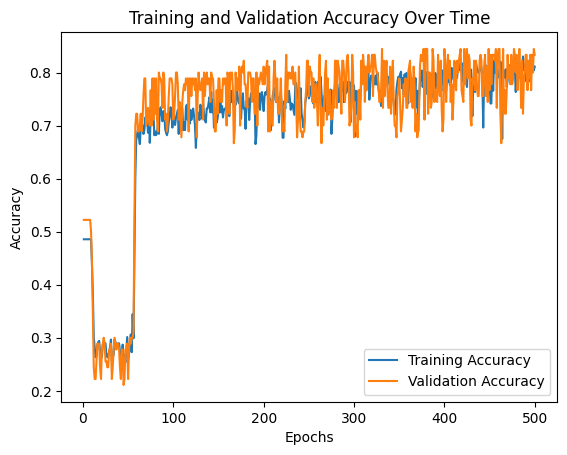

In [107]:
import matplotlib.pyplot as plt

# Assuming you have already trained the model and have the 'history' object

# Access the accuracy values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation accuracy over time
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


##### Results - **Basic Neural Network**

Test Loss: 0.5767286419868469, Test Accuracy: 0.7777777910232544


### FNN

In [39]:
X_train.shape

(418, 3)

In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, classification_report

# Define the number of features in your dataset
input_dim = 3  # Replace with the actual number of features

# Define the FNN model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Assuming binary classification, adjust for multiclass
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
y_test_pred_prob = model.predict(X_test)
y_test_pred_fnn = (y_test_pred_prob > 0.5).astype(int)  # Apply a threshold (0.5 for binary classification)
accuracy_test_fnn = accuracy_score(y_test, y_test_pred_fnn)
print(f'FNN Test Accuracy: {accuracy_test_fnn:.2f}')

# Display classification report on the test set
print('\nFNN Classification Report on Test Set:\n', classification_report(y_test, y_test_pred_fnn))


Epoch 1/50
 1/14 [=>............................] - ETA: 3s - loss: 36.2269 - accuracy: 0.4688

2023-12-12 01:34:01.534613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 32ms/step - loss: 12.0023 - accuracy: 0.4976 - val_loss: 2.7768 - val_accuracy: 0.6556
Epoch 2/50
 1/14 [=>............................] - ETA: 0s - loss: 1.9801 - accuracy: 0.7188

2023-12-12 01:34:01.985489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 12ms/step - loss: 2.4173 - accuracy: 0.6722 - val_loss: 2.2135 - val_accuracy: 0.7667
Epoch 3/50
14/14 [==============================] - 0s 10ms/step - loss: 2.7203 - accuracy: 0.6818 - val_loss: 2.4219 - val_accuracy: 0.6778
Epoch 4/50
14/14 [==============================] - 0s 10ms/step - loss: 2.3829 - accuracy: 0.6818 - val_loss: 1.9207 - val_accuracy: 0.7667
Epoch 5/50
14/14 [==============================] - 0s 9ms/step - loss: 1.4245 - accuracy: 0.7057 - val_loss: 1.2354 - val_accuracy: 0.7778
Epoch 6/50
14/14 [==============================] - 0s 9ms/step - loss: 1.1914 - accuracy: 0.7392 - val_loss: 1.0240 - val_accuracy: 0.6889
Epoch 7/50
14/14 [==============================] - 0s 11ms/step - loss: 0.8607 - accuracy: 0.7273 - val_loss: 0.6689 - val_accuracy: 0.6778
Epoch 8/50
14/14 [==============================] - 0s 9ms/step - loss: 0.6545 - accuracy: 0.7249 - val_loss: 0.5352 - val_accuracy: 0.6778
Epoch 9/50
14/14 [=========

2023-12-12 01:34:08.894138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


### CNN


In [61]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, classification_report

# Assuming your input data shape is (598, 3)
sequence_length = 3  # Adjust based on your data
num_features = 1  # Assuming you want to treat each feature as a channel

# Reshape input data for 1D CNN sequence modeling
X_train_reshaped = X_train.reshape((X_train.shape[0], sequence_length, num_features))
X_val_reshaped = X_val.reshape((X_val.shape[0], sequence_length, num_features))
X_test_reshaped = X_test.reshape((X_test.shape[0], sequence_length, num_features))

# Define the 1D CNN model without max pooling
model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(sequence_length, num_features)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Assuming binary classification, adjust for multiclass
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_val_reshaped, y_val))

# Evaluate the model on the test set
y_test_pred_prob = model.predict(X_test_reshaped)
y_test_pred_cnn = (y_test_pred_prob > 0.5).astype(int)  # Apply a threshold (0.5 for binary classification)
accuracy_test_cnn = accuracy_score(y_test, y_test_pred_cnn)
print(f'1D CNN Test Accuracy: {accuracy_test_cnn:.2f}')

# Display classification report on the test set
print('\n1D CNN Classification Report on Test Set:\n', classification_report(y_test, y_test_pred_cnn))


Epoch 1/100


2023-12-12 07:48:46.810843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 42ms/step - loss: 6.7432 - accuracy: 0.4904 - val_loss: 0.5343 - val_accuracy: 0.7889
Epoch 2/100


2023-12-12 07:48:47.479818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 14ms/step - loss: 1.4794 - accuracy: 0.5502 - val_loss: 0.5003 - val_accuracy: 0.7889
Epoch 3/100
14/14 [==============================] - 0s 12ms/step - loss: 0.8489 - accuracy: 0.6603 - val_loss: 0.6920 - val_accuracy: 0.6889
Epoch 4/100
14/14 [==============================] - 0s 11ms/step - loss: 1.0464 - accuracy: 0.6268 - val_loss: 0.8596 - val_accuracy: 0.6778
Epoch 5/100
14/14 [==============================] - 0s 10ms/step - loss: 0.9306 - accuracy: 0.6531 - val_loss: 0.5565 - val_accuracy: 0.6889
Epoch 6/100
14/14 [==============================] - 0s 11ms/step - loss: 0.6056 - accuracy: 0.7273 - val_loss: 0.5441 - val_accuracy: 0.8000
Epoch 7/100
14/14 [==============================] - 0s 11ms/step - loss: 0.5710 - accuracy: 0.7297 - val_loss: 0.6109 - val_accuracy: 0.7556
Epoch 8/100
14/14 [==============================] - 0s 10ms/step - loss: 0.5621 - accuracy: 0.7153 - val_loss: 0.4901 - val_accuracy: 0.7222
Epoch 9/100
14/14 

2023-12-12 07:49:02.605519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


### Deeper CNN

In [63]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, classification_report

# Assuming your input data shape is (598, 3)
sequence_length = 3  # Adjust based on your data
num_features = 1  # Assuming you want to treat each feature as a channel

# Reshape input data for 1D CNN sequence modeling
X_train_reshaped = X_train.reshape((X_train.shape[0], sequence_length, num_features))
X_val_reshaped = X_val.reshape((X_val.shape[0], sequence_length, num_features))
X_test_reshaped = X_test.reshape((X_test.shape[0], sequence_length, num_features))

# Define a simpler 1D CNN model
model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(sequence_length, num_features)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Assuming binary classification, adjust for multiclass
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_val_reshaped, y_val))

# Evaluate the model on the test set
y_test_pred_prob = model.predict(X_test_reshaped)
y_test_pred_cnn = (y_test_pred_prob > 0.5).astype(int)  # Apply a threshold (0.5 for binary classification)
accuracy_test_cnn = accuracy_score(y_test, y_test_pred_cnn)
print(f'1D CNN Test Accuracy: {accuracy_test_cnn:.2f}')

# Display classification report on the test set
print('\n1D CNN Classification Report on Test Set:\n', classification_report(y_test, y_test_pred_cnn))



Epoch 1/100


2023-12-12 07:49:16.187297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 41ms/step - loss: 9.5086 - accuracy: 0.3828 - val_loss: 4.8391 - val_accuracy: 0.3556
Epoch 2/100
 1/14 [=>............................] - ETA: 0s - loss: 4.0551 - accuracy: 0.3750

2023-12-12 07:49:16.790152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 15ms/step - loss: 2.8186 - accuracy: 0.3828 - val_loss: 1.3291 - val_accuracy: 0.4111
Epoch 3/100
14/14 [==============================] - 0s 10ms/step - loss: 0.8178 - accuracy: 0.6316 - val_loss: 0.6175 - val_accuracy: 0.7778
Epoch 4/100
14/14 [==============================] - 0s 10ms/step - loss: 0.6982 - accuracy: 0.7201 - val_loss: 0.5322 - val_accuracy: 0.7667
Epoch 5/100
14/14 [==============================] - 0s 10ms/step - loss: 0.5844 - accuracy: 0.6938 - val_loss: 0.5427 - val_accuracy: 0.6889
Epoch 6/100
14/14 [==============================] - 0s 11ms/step - loss: 0.5765 - accuracy: 0.6699 - val_loss: 0.5095 - val_accuracy: 0.6889
Epoch 7/100
14/14 [==============================] - 0s 15ms/step - loss: 0.6067 - accuracy: 0.6842 - val_loss: 0.5104 - val_accuracy: 0.6889
Epoch 8/100
14/14 [==============================] - 0s 11ms/step - loss: 0.5682 - accuracy: 0.6770 - val_loss: 0.6331 - val_accuracy: 0.6778
Epoch 9/100
14/14 

2023-12-12 07:49:30.750047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


### CNN - DenseNet

In [67]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, classification_report

# Assuming your input data shape is (598, 3)
sequence_length = 3  # Adjust based on your data
num_features = 1  # Assuming you want to treat each feature as a channel

# Reshape input data for 1D CNN sequence modeling
X_train_reshaped = X_train.reshape((X_train.shape[0], sequence_length, num_features))
X_val_reshaped = X_val.reshape((X_val.shape[0], sequence_length, num_features))
X_test_reshaped = X_test.reshape((X_test.shape[0], sequence_length, num_features))

# Define a simplified 1D DenseNet model
def dense_block(x, filters, num_blocks=4):
    for _ in range(num_blocks):
        y = layers.Conv1D(filters, kernel_size=3, padding='same', activation='relu')(x)
        x = layers.concatenate([x, y], axis=-1)
    return x

inputs = layers.Input(shape=(sequence_length, num_features))
x = dense_block(inputs, filters=32)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_val_reshaped, y_val))

# Evaluate the model on the test set
y_test_pred_prob = model.predict(X_test_reshaped)
y_test_pred_densenet = (y_test_pred_prob > 0.5).astype(int)  # Apply a threshold (0.5 for binary classification)
accuracy_test_densenet = accuracy_score(y_test, y_test_pred_densenet)
print(f'1D DenseNet Test Accuracy: {accuracy_test_densenet:.2f}')

# Display classification report on the test set
print('\n1D DenseNet Classification Report on Test Set:\n', classification_report(y_test, y_test_pred_densenet))


Epoch 1/100


2023-12-12 07:52:06.100123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - ETA: 0s - loss: 4.1235 - accuracy: 0.5120

2023-12-12 07:52:07.143472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 2s 66ms/step - loss: 4.1235 - accuracy: 0.5120 - val_loss: 0.6744 - val_accuracy: 0.6889
Epoch 2/100
14/14 [==============================] - 0s 21ms/step - loss: 0.9006 - accuracy: 0.7177 - val_loss: 0.6755 - val_accuracy: 0.7889
Epoch 3/100
14/14 [==============================] - 0s 19ms/step - loss: 0.9055 - accuracy: 0.6459 - val_loss: 1.5557 - val_accuracy: 0.5556
Epoch 4/100
14/14 [==============================] - 0s 16ms/step - loss: 1.1750 - accuracy: 0.6364 - val_loss: 0.5418 - val_accuracy: 0.7222
Epoch 5/100
14/14 [==============================] - 0s 16ms/step - loss: 0.8307 - accuracy: 0.6603 - val_loss: 1.8300 - val_accuracy: 0.5222
Epoch 6/100
14/14 [==============================] - 0s 16ms/step - loss: 1.5223 - accuracy: 0.5718 - val_loss: 1.6835 - val_accuracy: 0.5556
Epoch 7/100
14/14 [==============================] - 0s 13ms/step - loss: 0.9701 - accuracy: 0.6364 - val_loss: 0.5355 - val_accuracy: 0.7889
Epoch 8/100
14/14 

2023-12-12 07:52:26.954594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 47ms/step
1D DenseNet Test Accuracy: 0.78

1D DenseNet Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76        41
           1       0.80      0.80      0.80        49

    accuracy                           0.78        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.78      0.78      0.78        90



### RNN

In [52]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, classification_report

# Assuming your input data shape is (598, 3)
input_dim = 3  # Replace with the actual number of features

# Define the FNN model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Assuming binary classification, adjust for multiclass
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
y_test_pred_prob = model.predict(X_test)
y_test_pred_fnn = (y_test_pred_prob > 0.5).astype(int)  # Apply a threshold (0.5 for binary classification)
accuracy_test_fnn = accuracy_score(y_test, y_test_pred_fnn)
print(f'FNN Test Accuracy: {accuracy_test_fnn:.2f}')

# Display classification report on the test set
print('\nFNN Classification Report on Test Set:\n', classification_report(y_test, y_test_pred_fnn))


Epoch 1/100


2023-12-12 07:44:41.404815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 37ms/step - loss: 22.6080 - accuracy: 0.5981 - val_loss: 17.7920 - val_accuracy: 0.5111
Epoch 2/100
 1/14 [=>............................] - ETA: 0s - loss: 13.2282 - accuracy: 0.6562

2023-12-12 07:44:41.994060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 12ms/step - loss: 8.8819 - accuracy: 0.6555 - val_loss: 4.7408 - val_accuracy: 0.6778
Epoch 3/100
14/14 [==============================] - 0s 11ms/step - loss: 3.9942 - accuracy: 0.7153 - val_loss: 3.8830 - val_accuracy: 0.7667
Epoch 4/100
14/14 [==============================] - 0s 10ms/step - loss: 3.4442 - accuracy: 0.6890 - val_loss: 2.5534 - val_accuracy: 0.7222
Epoch 5/100
14/14 [==============================] - 0s 11ms/step - loss: 2.8258 - accuracy: 0.7273 - val_loss: 2.0224 - val_accuracy: 0.7778
Epoch 6/100
14/14 [==============================] - 0s 11ms/step - loss: 2.2069 - accuracy: 0.7416 - val_loss: 1.5701 - val_accuracy: 0.7000
Epoch 7/100
14/14 [==============================] - 0s 10ms/step - loss: 1.6218 - accuracy: 0.7273 - val_loss: 1.0780 - val_accuracy: 0.7222
Epoch 8/100
14/14 [==============================] - 0s 9ms/step - loss: 1.1507 - accuracy: 0.6866 - val_loss: 1.4332 - val_accuracy: 0.6667
Epoch 9/100
14/14 [

2023-12-12 07:44:55.424022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


### LSTM

Epoch 1/100


2023-12-12 07:54:34.573047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - ETA: 0s - loss: 1.8152 - accuracy: 0.4904

2023-12-12 07:54:36.132062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 2s 95ms/step - loss: 1.8152 - accuracy: 0.4904 - val_loss: 0.6062 - val_accuracy: 0.6778
Epoch 2/100
14/14 [==============================] - 0s 36ms/step - loss: 0.7457 - accuracy: 0.6627 - val_loss: 0.5777 - val_accuracy: 0.7444
Epoch 3/100
14/14 [==============================] - 0s 32ms/step - loss: 0.5971 - accuracy: 0.6818 - val_loss: 0.5585 - val_accuracy: 0.7111
Epoch 4/100
14/14 [==============================] - 0s 32ms/step - loss: 0.5951 - accuracy: 0.6507 - val_loss: 0.4899 - val_accuracy: 0.7333
Epoch 5/100
14/14 [==============================] - 0s 32ms/step - loss: 0.5523 - accuracy: 0.7201 - val_loss: 0.5117 - val_accuracy: 0.6889
Epoch 6/100
14/14 [==============================] - 0s 32ms/step - loss: 0.5486 - accuracy: 0.7249 - val_loss: 0.5029 - val_accuracy: 0.7444
Epoch 7/100
14/14 [==============================] - 0s 35ms/step - loss: 0.5199 - accuracy: 0.7344 - val_loss: 0.4707 - val_accuracy: 0.7222
Epoch 8/100
14/14 

2023-12-12 07:55:17.510774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 48ms/step
LSTM Test Accuracy: 0.81

LSTM Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        49

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



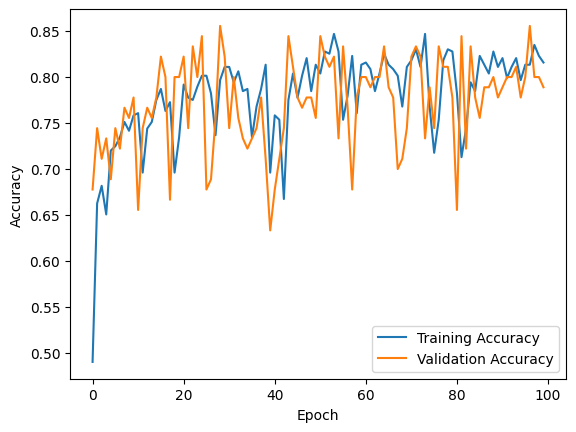

In [72]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, classification_report

# Assuming your input data shape is (598, 3)
sequence_length = 3  # Adjust based on your data
num_features = 1  # Assuming you want to treat each feature as a channel

# Reshape input data for sequence modeling
X_train_reshaped = X_train.reshape((X_train.shape[0], sequence_length, num_features))
X_val_reshaped = X_val.reshape((X_val.shape[0], sequence_length, num_features))
X_test_reshaped = X_test.reshape((X_test.shape[0], sequence_length, num_features))

# Define the LSTM model
model = models.Sequential([
    layers.LSTM(64, activation='relu', input_shape=(sequence_length, num_features)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Assuming binary classification, adjust for multiclass
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_val_reshaped, y_val))

# Evaluate the model on the test set
y_test_pred_prob = model.predict(X_test_reshaped)
y_test_pred_lstm = (y_test_pred_prob > 0.5).astype(int)  # Apply a threshold (0.5 for binary classification)
accuracy_test_lstm = accuracy_score(y_test, y_test_pred_lstm)
print(f'LSTM Test Accuracy: {accuracy_test_lstm:.2f}')

# Display classification report on the test set
print('\nLSTM Classification Report on Test Set:\n', classification_report(y_test, y_test_pred_lstm))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### GRU

Epoch 1/100


2023-12-12 08:32:34.305628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - ETA: 0s - loss: 1.7023 - accuracy: 0.5072

2023-12-12 08:32:39.614718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 8s 299ms/step - loss: 1.7023 - accuracy: 0.5072 - val_loss: 0.6676 - val_accuracy: 0.6333
Epoch 2/100
14/14 [==============================] - 2s 135ms/step - loss: 0.9100 - accuracy: 0.5957 - val_loss: 0.6406 - val_accuracy: 0.5889
Epoch 3/100
14/14 [==============================] - 2s 115ms/step - loss: 0.8645 - accuracy: 0.6388 - val_loss: 1.0590 - val_accuracy: 0.4778
Epoch 4/100
14/14 [==============================] - 2s 120ms/step - loss: 0.7790 - accuracy: 0.6148 - val_loss: 0.6187 - val_accuracy: 0.6444
Epoch 5/100
14/14 [==============================] - 2s 113ms/step - loss: 0.9049 - accuracy: 0.6100 - val_loss: 0.5894 - val_accuracy: 0.7000
Epoch 6/100
14/14 [==============================] - 2s 112ms/step - loss: 0.9027 - accuracy: 0.5957 - val_loss: 0.8050 - val_accuracy: 0.6111
Epoch 7/100
14/14 [==============================] - 2s 109ms/step - loss: 0.8466 - accuracy: 0.6483 - val_loss: 1.1459 - val_accuracy: 0.5333
Epoch 8/100

2023-12-12 08:35:06.727094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 92ms/step
GRU Test Accuracy: 0.79

GRU Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.69      0.98      0.81        41
           1       0.97      0.63      0.77        49

    accuracy                           0.79        90
   macro avg       0.83      0.80      0.79        90
weighted avg       0.84      0.79      0.78        90



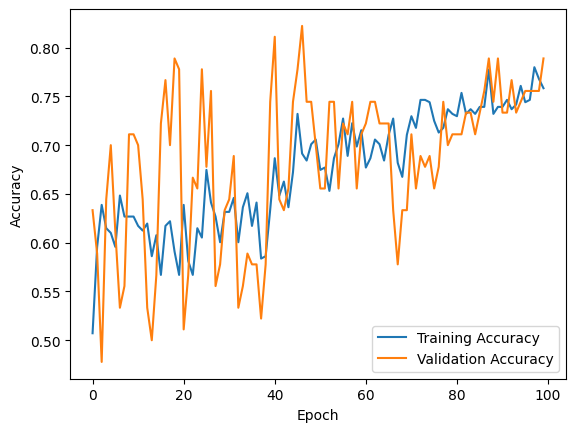

In [77]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Assuming your input data shape is (598, 3)
sequence_length = 3  # Adjust based on your data
num_features = 1  # Assuming you want to treat each feature as a channel

# Reshape input data for sequence modeling
X_train_reshaped = X_train.reshape((X_train.shape[0], sequence_length, num_features))
X_val_reshaped = X_val.reshape((X_val.shape[0], sequence_length, num_features))
X_test_reshaped = X_test.reshape((X_test.shape[0], sequence_length, num_features))

# Define the GRU model with regularization and different architecture
model = models.Sequential([
    layers.GRU(128, activation='relu', input_shape=(sequence_length, num_features), dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    layers.GRU(64, activation='relu', dropout=0.2, recurrent_dropout=0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),  # Additional dropout for regularization
    layers.Dense(1, activation='sigmoid')  # Assuming binary classification, adjust for multiclass
])

# Adjust the learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_val_reshaped, y_val))

# Evaluate the model on the test set
y_test_pred_prob = model.predict(X_test_reshaped)
y_test_pred_gru = (y_test_pred_prob > 0.5).astype(int)  # Apply a threshold (0.5 for binary classification)
accuracy_test_gru = accuracy_score(y_test, y_test_pred_gru)
print(f'GRU Test Accuracy: {accuracy_test_gru:.2f}')

# Display classification report on the test set
print('\nGRU Classification Report on Test Set:\n', classification_report(y_test, y_test_pred_gru))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


##### 1.3.2 Deeper Neural Network


In [108]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Assuming you have X_train, y_train, X_val, y_val from the previous steps

# Reshape y_train
y_train = y_train.reshape(-1, 1)

# Create a Sequential model
model = Sequential()

# Add the input layer
model.add(Dense(64, input_dim=3, activation='relu'))

# Add a hidden layer
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Add another hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Check the shapes before training
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


X_train shape: (418, 3)
y_train shape: (418, 1)
Epoch 1/150


2023-12-04 00:26:32.795143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - ETA: 0s - loss: 0.7627 - accuracy: 0.6507

2023-12-04 00:26:34.144312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 2s 71ms/step - loss: 0.7627 - accuracy: 0.6507 - val_loss: 2.1174 - val_accuracy: 0.6444
Epoch 2/150
14/14 [==============================] - 0s 28ms/step - loss: 0.5944 - accuracy: 0.7129 - val_loss: 1.2496 - val_accuracy: 0.7000
Epoch 3/150
14/14 [==============================] - 0s 25ms/step - loss: 0.6660 - accuracy: 0.6579 - val_loss: 0.9536 - val_accuracy: 0.6556
Epoch 4/150
14/14 [==============================] - 0s 32ms/step - loss: 0.5638 - accuracy: 0.7368 - val_loss: 0.5106 - val_accuracy: 0.8000
Epoch 5/150
14/14 [==============================] - 0s 28ms/step - loss: 0.5429 - accuracy: 0.7105 - val_loss: 0.5268 - val_accuracy: 0.7778
Epoch 6/150
14/14 [==============================] - 0s 25ms/step - loss: 0.5347 - accuracy: 0.7177 - val_loss: 0.9347 - val_accuracy: 0.6556
Epoch 7/150
14/14 [==============================] - 0s 23ms/step - loss: 0.5228 - accuracy: 0.7560 - val_loss: 0.6324 - val_accuracy: 0.7222
Epoch 8/150
14/14 

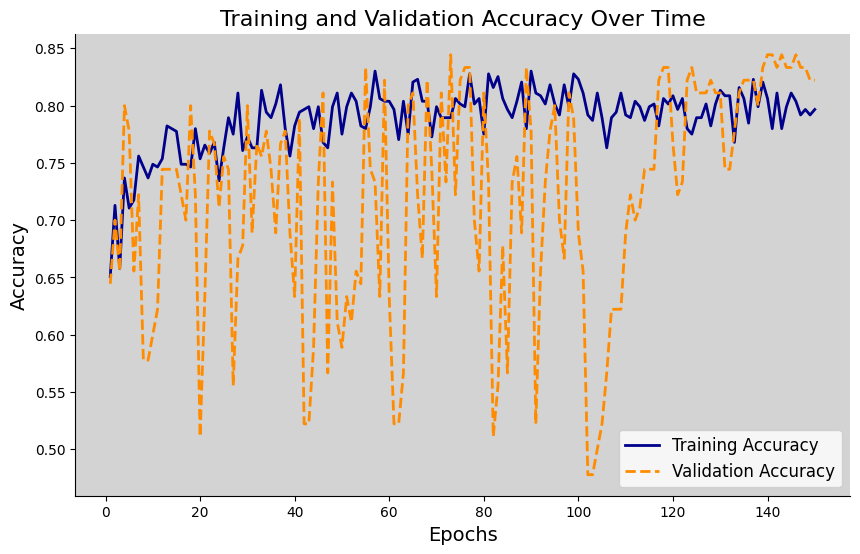

In [109]:
import matplotlib.pyplot as plt

# Assuming you have already trained the model and have the 'history' object

# Access the accuracy values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation accuracy over time
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(10, 6))

# Plot with a smooth line for training accuracy
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='', linestyle='-', color='darkblue', linewidth=2)

# Plot with a dashed line for validation accuracy
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='', linestyle='--', color='darkorange', linewidth=2)

# Title and labels
plt.title('Training and Validation Accuracy Over Time', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Set a background color for the plot
plt.gca().set_facecolor('lightgray')

# Add a legend
plt.legend(loc='best', fontsize=12)

# Remove top and right spines for aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.show()


##### Deeper Neural Netowork, v2


In [114]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Assuming you have X_train, y_train, X_test, y_test from the previous steps

# Reshape y_train and y_test
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Create a Sequential model
model = Sequential()

# Add the input layer
model.add(Dense(128, input_dim=3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Add a hidden layer
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and a lower learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.15)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/300


2023-12-04 00:33:10.349106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - ETA: 0s - loss: 0.7852 - accuracy: 0.5972

2023-12-04 00:33:12.041639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 2s 121ms/step - loss: 0.7852 - accuracy: 0.5972 - val_loss: 0.8265 - val_accuracy: 0.7778
Epoch 2/300
12/12 [==============================] - 0s 32ms/step - loss: 0.5523 - accuracy: 0.7183 - val_loss: 2.3065 - val_accuracy: 0.6190
Epoch 3/300
12/12 [==============================] - 0s 41ms/step - loss: 0.5557 - accuracy: 0.7183 - val_loss: 2.3441 - val_accuracy: 0.5556
Epoch 4/300
12/12 [==============================] - 1s 52ms/step - loss: 0.5701 - accuracy: 0.7099 - val_loss: 1.7021 - val_accuracy: 0.6190
Epoch 5/300
12/12 [==============================] - 0s 32ms/step - loss: 0.5600 - accuracy: 0.7183 - val_loss: 1.0045 - val_accuracy: 0.6508
Epoch 6/300
12/12 [==============================] - 0s 27ms/step - loss: 0.5499 - accuracy: 0.7099 - val_loss: 0.6959 - val_accuracy: 0.6984
Epoch 7/300
12/12 [==============================] - 0s 26ms/step - loss: 0.5580 - accuracy: 0.7155 - val_loss: 0.5526 - val_accuracy: 0.7778
Epoch 8/300
12/12

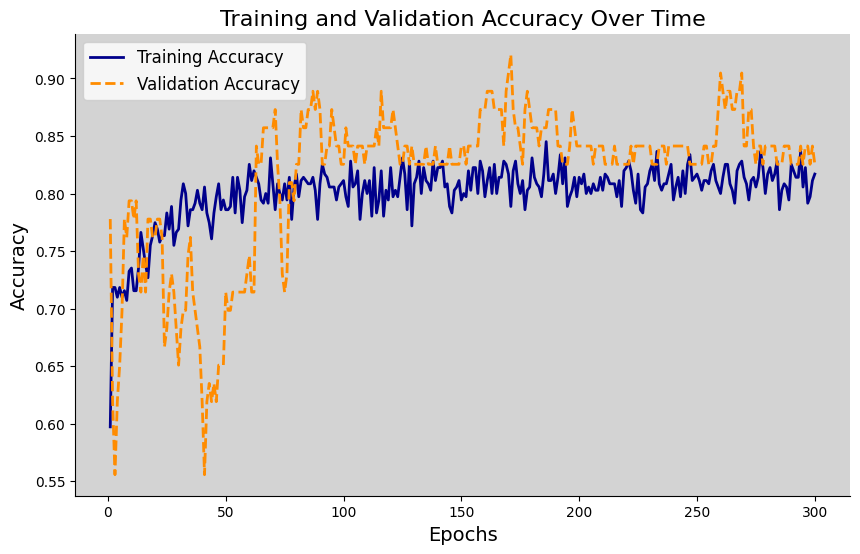

In [116]:
import matplotlib.pyplot as plt

# Assuming you have already trained the model and have the 'history' object

# Access the accuracy values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation accuracy over time
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(10, 6))

# Plot with a smooth line for training accuracy
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='', linestyle='-', color='darkblue', linewidth=1)

# Plot with a dashed line for validation accuracy
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='', linestyle='.', color='darkteal', linewidth=1)

# Title and labels
plt.title('Training and Validation Accuracy Over Time', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Set a background color for the plot 
plt.gca().set_facecolor('lightgray')

# Add a legend
plt.legend(loc='best', fontsize=12)

# Remove top and right spines for aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.show()


##### Deeper Neural Netowork, v3


In [119]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping  # Add this import

# Normalize input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Assuming you have X_train, y_train, X_test, y_test from the previous steps
# Reshape y_train and y_test
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Create a Sequential model
model = Sequential()

# Add the input layer
model.add(Dense(128, input_dim=3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Add a hidden layer
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and a lower learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model with EarlyStopping callback
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.15, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/300


2023-12-04 00:49:56.068320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - ETA: 0s - loss: 0.8772 - accuracy: 0.4761

2023-12-04 00:49:57.599605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 2s 98ms/step - loss: 0.8772 - accuracy: 0.4761 - val_loss: 0.7004 - val_accuracy: 0.5397
Epoch 2/300
12/12 [==============================] - 0s 27ms/step - loss: 0.6631 - accuracy: 0.6197 - val_loss: 0.6578 - val_accuracy: 0.7302
Epoch 3/300
12/12 [==============================] - 0s 25ms/step - loss: 0.6237 - accuracy: 0.6704 - val_loss: 0.6192 - val_accuracy: 0.8254
Epoch 4/300
12/12 [==============================] - 0s 20ms/step - loss: 0.5630 - accuracy: 0.6873 - val_loss: 0.5894 - val_accuracy: 0.8571
Epoch 5/300
12/12 [==============================] - 0s 23ms/step - loss: 0.5255 - accuracy: 0.7352 - val_loss: 0.5667 - val_accuracy: 0.8254
Epoch 6/300
12/12 [==============================] - 0s 19ms/step - loss: 0.5207 - accuracy: 0.7437 - val_loss: 0.5447 - val_accuracy: 0.8413
Epoch 7/300
12/12 [==============================] - 0s 16ms/step - loss: 0.5108 - accuracy: 0.7606 - val_loss: 0.5249 - val_accuracy: 0.8254
Epoch 8/300
12/12 

##### Deeper Neural Netowork, v4

In [128]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Normalize input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Assuming you have X_train, y_train, X_test, y_test from the previous steps
# Reshape y_train and y_test
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Create a Sequential model
model = Sequential()

# Add the input layer
model.add(Dense(512, input_dim=3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.6))

# Add a hidden layer with LeakyReLU activation
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Add another hidden layer
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Add another hidden layer
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and a lower learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.00005), metrics=['accuracy'])

# Train the model with EarlyStopping callback
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=600, batch_size=32, validation_split=0.15)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/600


2023-12-04 00:59:02.504186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - ETA: 0s - loss: 0.8483 - accuracy: 0.5465

2023-12-04 00:59:06.061009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 5s 208ms/step - loss: 0.8483 - accuracy: 0.5465 - val_loss: 0.6814 - val_accuracy: 0.6349
Epoch 2/600
12/12 [==============================] - 1s 44ms/step - loss: 0.7688 - accuracy: 0.5746 - val_loss: 0.6757 - val_accuracy: 0.5873
Epoch 3/600
12/12 [==============================] - 0s 41ms/step - loss: 0.7969 - accuracy: 0.6085 - val_loss: 0.6693 - val_accuracy: 0.5556
Epoch 4/600
12/12 [==============================] - 0s 39ms/step - loss: 0.7317 - accuracy: 0.6563 - val_loss: 0.6666 - val_accuracy: 0.5397
Epoch 5/600
12/12 [==============================] - 0s 39ms/step - loss: 0.6528 - accuracy: 0.6592 - val_loss: 0.6625 - val_accuracy: 0.5238
Epoch 6/600
12/12 [==============================] - 0s 36ms/step - loss: 0.6416 - accuracy: 0.6704 - val_loss: 0.6598 - val_accuracy: 0.5079
Epoch 7/600
12/12 [==============================] - 0s 37ms/step - loss: 0.6214 - accuracy: 0.6817 - val_loss: 0.6570 - val_accuracy: 0.5079
Epoch 8/600
12/12

##### Plot the history - train, test accuracy

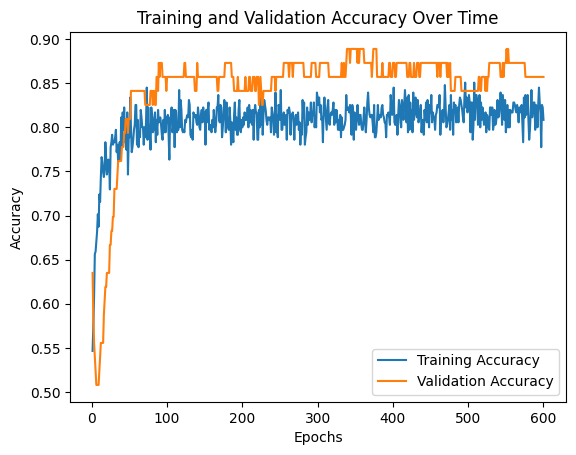

In [129]:
import matplotlib.pyplot as plt

# Assuming you have already trained the model and have the 'history' object

# Access the accuracy values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation accuracy over time
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# 3. Final results & analysis